In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib
matplotlib.rcParams['font.size'] = 16
#matplotlib.rcParams['figure.figsize'] = (10, 7)
matplotlib.rcParams['figure.facecolor'] = '#000000'
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="ticks", color_codes=True)
# Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)
from sklearn.linear_model import LinearRegression
import plotly.graph_objs as go

import missingno

In [39]:
raw_dataset=pd.read_csv('/content/marketing_data.csv')

In [40]:
raw_dataset.shape

(2240, 28)

In [41]:
raw_dataset.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [42]:
raw_dataset

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,IND


In [43]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

ID: Customer's unique identifier

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status:Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Tennhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the

Recency: Number of days since customer's last purchase

MntWines: Amount spent on wine in the last 2 years

MntFruits: Amount spent on fruits in the last 2 years

MntMeatProducts: Amount spent on meat in the last 2 years

MntFishProducts: Amount spent on fish in the last 2 years

MntSweetProducts: Amount spent on sweets in the last 2 years

MntGoldProds: Amount spent on gold in the last 2 years

NumDealsPurchase: Number of purchases made with a discount

NumWebPurchase: Number of purchases made through the company's web site

NumCatalogPurchase: Number of purchases made using a catalogue

NumStorePurchase: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company's web site in the last month

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 2 if customer accepted the offer in the 1st campaign, 0 otherwise

Respones: 1 if customer accepted the offer in the last campaign, 0 otherwise

Complain: 1 if customer complained in the last 2 years, 0 otherwise

Country: Customer's location

In [44]:
raw_dataset.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


50%-median if mean is greater than median then the dataset is skewed(+vely skewed) or right skewed . if there is a skewness in our dataset then this implies than our dataset has outliers

if the difference between the min and the max value is more than it had large spread of skewness

In [45]:
dataset=raw_dataset.copy()

In [46]:
dataset.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [47]:
dataset.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,IND
2239,4070,1969,PhD,Married,"$94,871.00",0,2,9/1/12,99,169,24,553,188,0,144,1,8,5,4,7,0,1,1,0,0,1,0,CA


In [48]:
if len(dataset[dataset.duplicated()])> 0:
  print ("no. of duplicated entries:", len(dataset[dataset.duplicated()]))
  print (dataset[dataset.duplicated (keep=False)].sort_values(by=list(dataset.columns)).head())
else:
    print("no duplicate entries found")

no duplicate entries found


In [49]:
dataset.isnull().sum().sort_values(ascending=False)

 Income                24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

This tells us two things:

Income column is of string type
Income column has some missing values


 preview of data with null values:

       ID  Year_Birth   Education Marital_Status  Income   Kidhome  Teenhome  \
134  8996        1957         PhD        Married      NaN        2         1   
262  1994        1983  Graduation        Married      NaN        1         0   
394  3769        1972         PhD       Together      NaN        1         0   

    Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
134    11/19/12        4       230         42              192   
262    11/15/13       11         5          5                6   
394      3/2/14       17        25          1               13   

     MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
134               49                37            53                 12   
262                0                 2             1                  1   
394                0                 0             3                  1   

     NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
134         

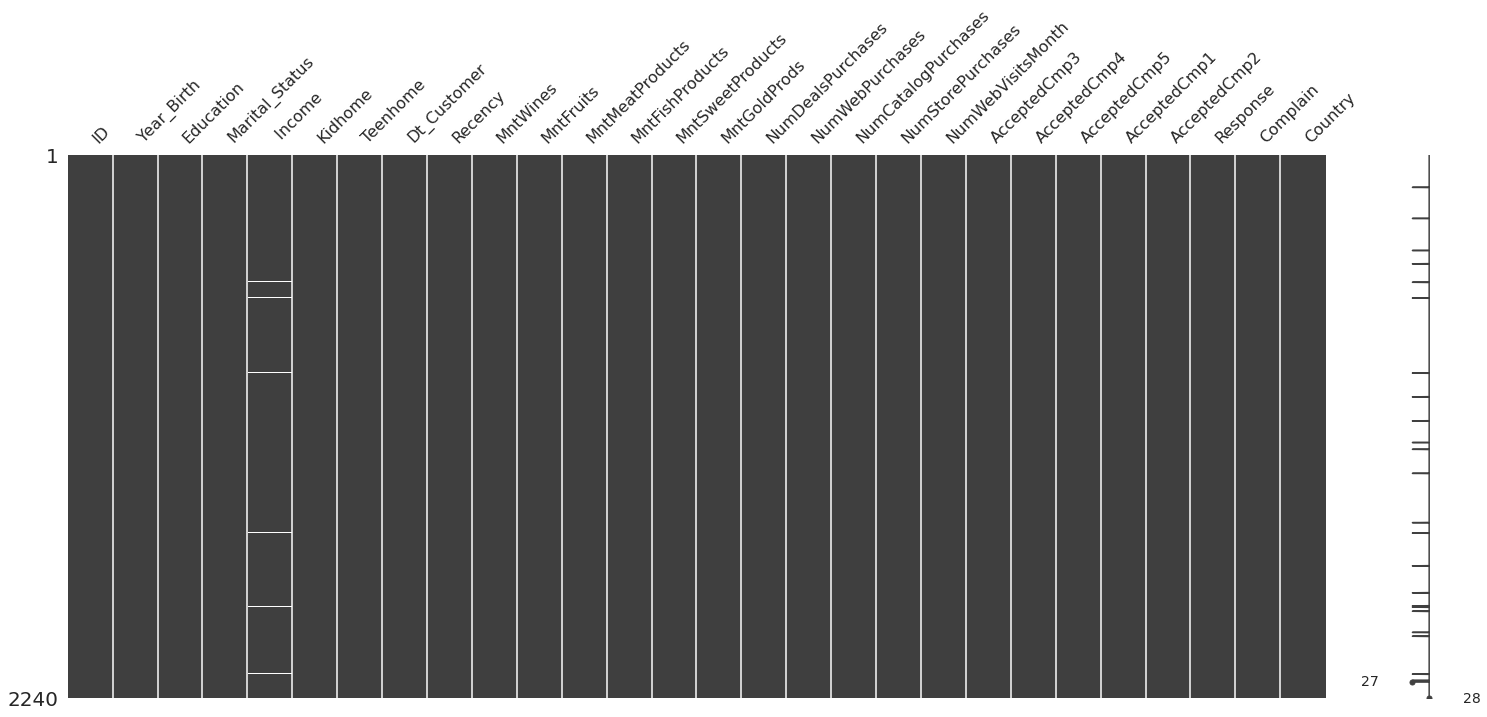

In [50]:
if dataset.isnull().any(axis=None):
  print("\n preview of data with null values:\n")
  print(dataset[dataset.isnull().any(axis=1)].head(3))
  missingno.matrix(dataset)
  plt.show()

In [51]:
dataset.rename(columns={' Income ':'Income'}, inplace=True)


In [52]:
dataset["Income"] = dataset["Income"].str.strip('$')
dataset["Income"] = dataset["Income"].str.replace(".", "")
dataset["Income"] = dataset["Income"].str.replace(",", "")
dataset["Income"]= dataset["Income"].str.replace("00 ", "")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [53]:
dataset['Income'] = dataset['Income'].astype('float')

Handling the 24 missing values of the Income column

Option 1- Discard the 24 comlumns

Option 2- Insert the overall average value found in the Income column

In [54]:
dataset['Income'] = dataset['Income'].fillna(dataset['Income'].median())

In [55]:
dataset.isnull().sum().sort_values(ascending=False)

ID                     0
Year_Birth             0
Complain               0
Response               0
AcceptedCmp2           0
AcceptedCmp1           0
AcceptedCmp5           0
AcceptedCmp4           0
AcceptedCmp3           0
NumWebVisitsMonth      0
NumStorePurchases      0
NumCatalogPurchases    0
NumWebPurchases        0
NumDealsPurchases      0
MntGoldProds           0
MntSweetProducts       0
MntFishProducts        0
MntMeatProducts        0
MntFruits              0
MntWines               0
Recency                0
Dt_Customer            0
Teenhome               0
Kidhome                0
Income                 0
Marital_Status         0
Education              0
Country                0
dtype: int64

In [56]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  24


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
0,1826,1970,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0
1,1,1961,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0
2,10476,1958,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0
3,1386,1967,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0
4,5371,1989,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0


for discrete and categorical data

In [57]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 14


In [58]:
discrete_feature

['Kidhome',
 'Teenhome',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response',
 'Complain']

In [59]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 9


In [60]:
dataset['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [61]:
dataset['Marital_Status'] = dataset['Marital_Status'].replace(['YOLO','Alone', 'Absurd'],'Single')

In [62]:
dataset['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow'], dtype=object)

In [63]:
dataset['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [64]:
#change 2n cycle to master in education column
dataset['Education']=dataset['Education'].replace(['2n Cycle'],'Master')

In [65]:
dataset['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic'], dtype=object)

Temporal variables(datetime variable)

In [66]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['Year_Birth']

Children -> 'Kidhome'+'Teenhome'
Total_Mnt -> 'MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
Total_Purchases-> 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'
Total_Cmp -> 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',

In [67]:
#Creating a new feature
dataset["Total_Minors"]=dataset['Kidhome'] + dataset["Teenhome"]
dataset["Total_Mnt"]=dataset['MntWines'] + dataset["MntFruits"] + dataset["MntMeatProducts"] + dataset["MntFishProducts"] + dataset["MntSweetProducts"] + dataset["MntGoldProds"]
dataset["Total_Num"]=dataset["NumDealsPurchases"]+dataset["NumWebPurchases"]+dataset["NumCatalogPurchases"]+dataset["NumStorePurchases"]+dataset["NumWebVisitsMonth"]
dataset["Total_AcceptedCmp"]=dataset["AcceptedCmp3"]+dataset["AcceptedCmp4"]+dataset["AcceptedCmp5"]+dataset["AcceptedCmp1"]+dataset["AcceptedCmp2"]

In [68]:
#Calculating Age from Birth_Year
from datetime import date
dataset['Age']= date.today().year-dataset['Year_Birth']


# Analysing the Date Column

In [69]:
dataset['Dt_Customer']=pd.to_datetime(dataset['Dt_Customer'])

In [70]:
import datetime as dt

In [71]:
dataset['joining_month']=dataset['Dt_Customer'].dt.month
dataset['joining_year']=dataset['Dt_Customer'].dt.year
dataset['joining_days']=dataset['Dt_Customer'].dt.day
dataset['joining_weekday']=dataset['Dt_Customer'].dt.weekday

In [72]:
df1 = dataset.groupby('joining_month').count()

df2 = dataset.groupby('joining_year').count()
df3=dataset.groupby('joining_days').count()
df4=dataset.groupby('joining_weekday').count()

In [73]:
dataset.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Total_Minors,Total_Mnt,Total_Num,Total_AcceptedCmp,Age,joining_month,joining_year,joining_days,joining_weekday
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,0,1190,16,0,52,6,2014,16,0
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,0,577,23,1,61,6,2014,15,6
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,1,251,13,0,64,5,2014,13,1
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,2,11,11,0,55,5,2014,11,6
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,1,91,15,1,33,4,2014,8,1


# Outlier Detection

Finding OUTLIERS

What is an outlier? An outlier is a data point in a data set that is distant from all other observations. A data point that lies outside the overall distribution of the dataset.

What are the criteria to identify an outlier? Data point that falls outside of 1.5 times of an interquartile range above the 3rd quartile and below the 1st quartile Data point that falls outside of 3 standard deviations. we can use a z score and if the z score falls outside of 2 standard deviation

What is the reason for an outlier to exists in a dataset? Variability in the data An experimental measurement error

What are the impacts of having outliers in a dataset? It causes various problems during our statistical analysis It may cause a significant impact on the mean and the standard deviation

Various ways of finding the outlier. Using scatter plots Box plot using z score using the IQR interquantile range

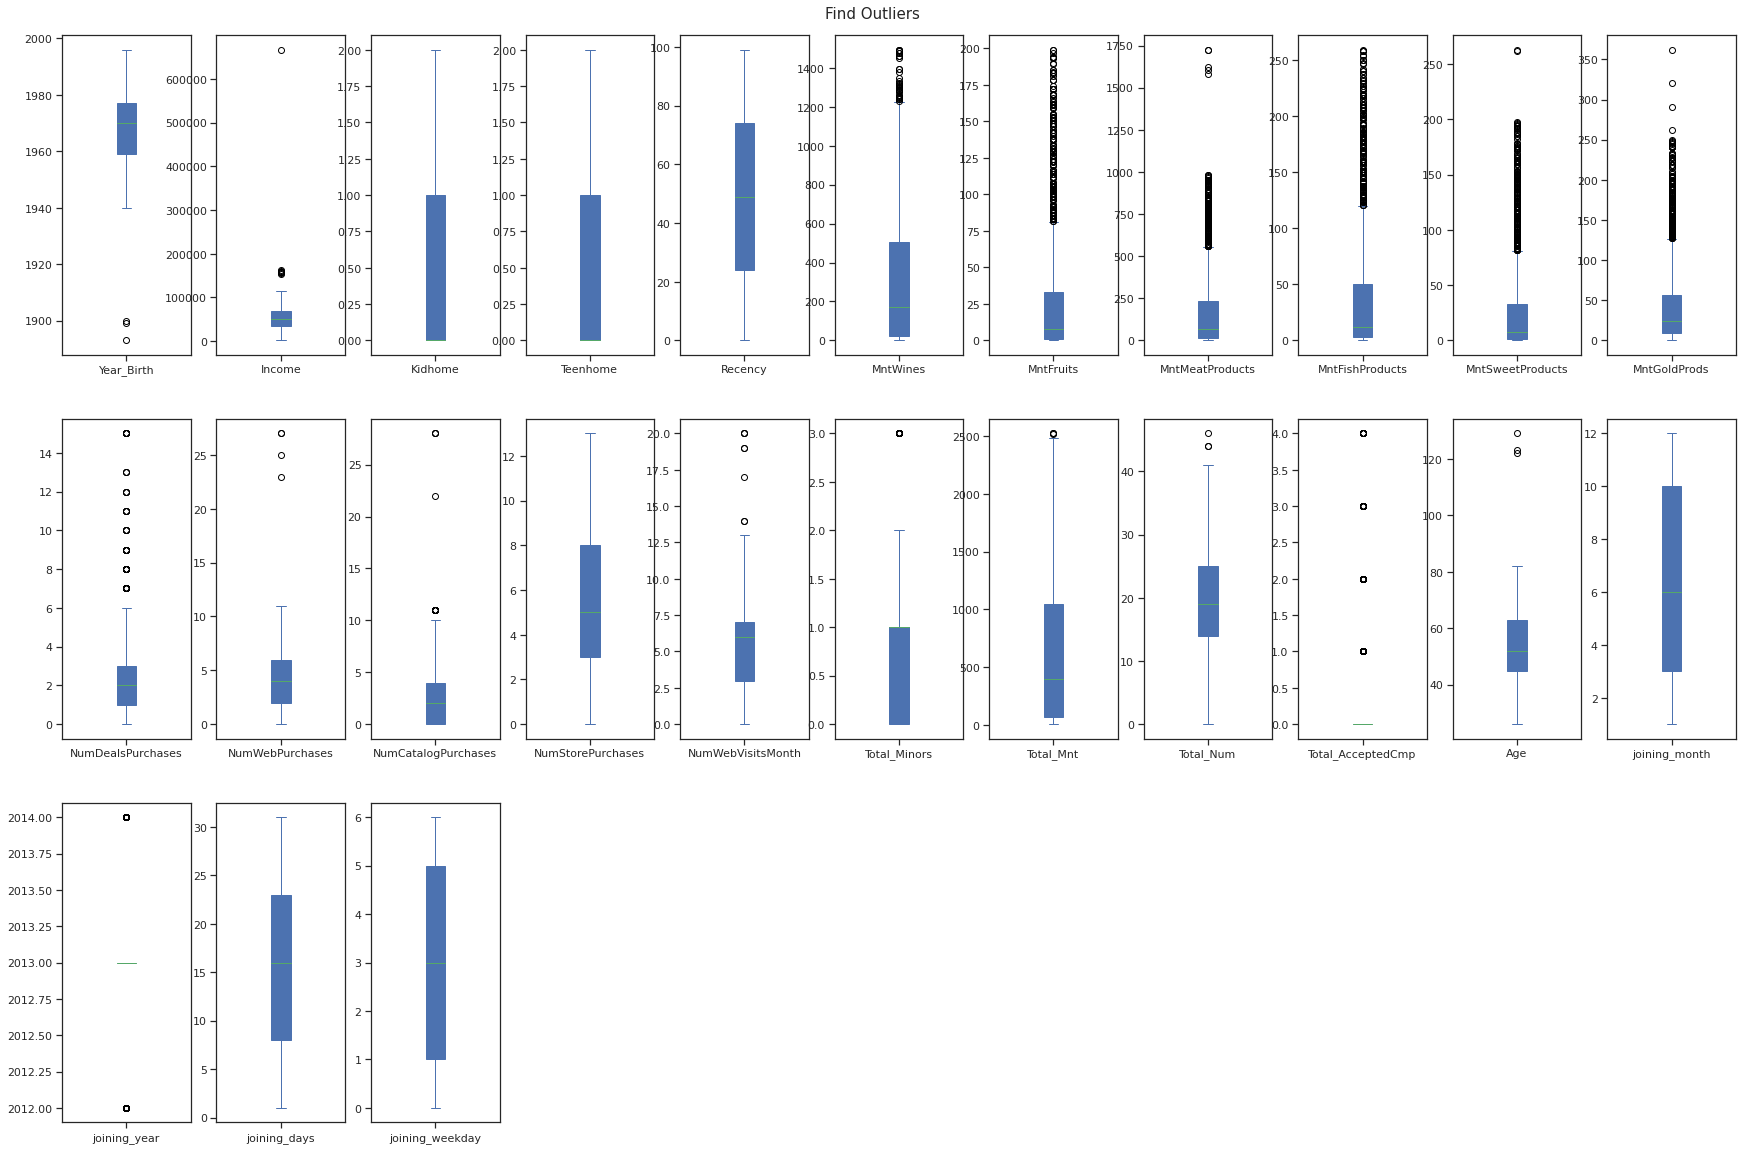

In [74]:
#See if there is any outliers

# select columns to plot
df_to_plot = dataset.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)
# subplots
df_to_plot.plot(subplots=True, layout=(3,11), kind='box', figsize=(30,20), patch_artist=True)
plt.suptitle('Find Outliers', fontsize=15, y=0.9)
plt.savefig('boxplots.png')
plt.show()

The outliers in the Year_birth looks like entry error as the data in it seems surreal (someone with age more than 122 years)  

In [75]:
dataset.to_csv('marketing-data-full.csv')

In [76]:
dataset.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Total_Minors',
       'Total_Mnt', 'Total_Num', 'Total_AcceptedCmp', 'Age', 'joining_month',
       'joining_year', 'joining_days', 'joining_weekday'],
      dtype='object')

# DATA VISUALIZATION

**1) What is the Age Distribution in the dataset?**

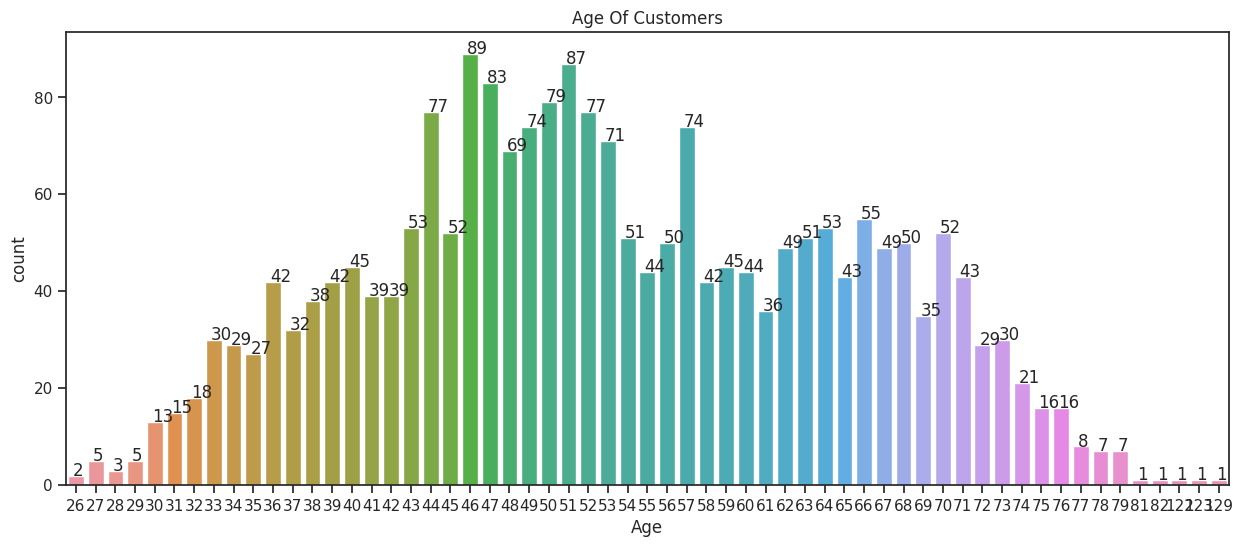

In [78]:
plt.figure(figsize=(15,6),dpi=100)
plt.title('Age Of Customers')
ax = sns.countplot(x=dataset['Age']);
for p in ax.patches: 
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 
plt.show()

**2) What are the most Revenue Generating Products?**

In [79]:
revenue=pd.DataFrame(dataset.iloc[:,9:15].sum(),columns=['rev_generated']).reset_index()
revenue

,index,rev_generated
0,MntWines,680816
1,MntFruits,58917
2,MntMeatProducts,373968
3,MntFishProducts,84057
4,MntSweetProducts,60621
5,MntGoldProds,98609


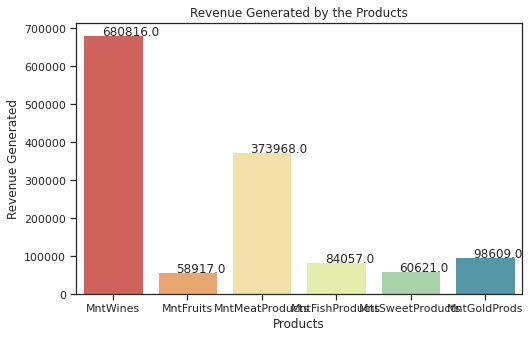

In [81]:
plt.figure(figsize=(8,5))
plt.title("Revenue Generated by the Products")
yx=sns.barplot(x='index',y='rev_generated',data=revenue,palette='Spectral')
plt.xlabel('Products')
plt.ylabel('Revenue Generated')
# for number to appear at the top of the bars
for p in yx.patches: 
    yx.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 
plt.show()


From this we can infer the most product sold is wine and the least popular product is fruits along with sweets

**3)Which Campaign is the most successful?**


In [82]:
campaigns= pd.DataFrame(dataset.iloc[:,20:25].sum(),columns=['amount']).reset_index()

In [83]:
campaigns

,index,amount
0,AcceptedCmp3,163
1,AcceptedCmp4,167
2,AcceptedCmp5,163
3,AcceptedCmp1,144
4,AcceptedCmp2,30


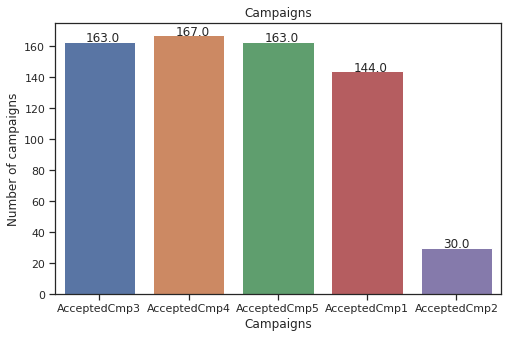

In [84]:
plt.figure(figsize=(8,5))
plt.title("Campaigns")
yx=sns.barplot(x='index',y='amount',data=campaigns)
plt.xlabel('Campaigns')
plt.ylabel('Number of campaigns')
# for number to appear at the top of the bars
for p in yx.patches: 
    yx.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 
plt.show()

Campaign 4 was the most successful campaign out of all the campaigns

**4)Does the number of minor affect the amount of purchases?**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 34.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 35.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Total amount spent v/s Total number of Minors')

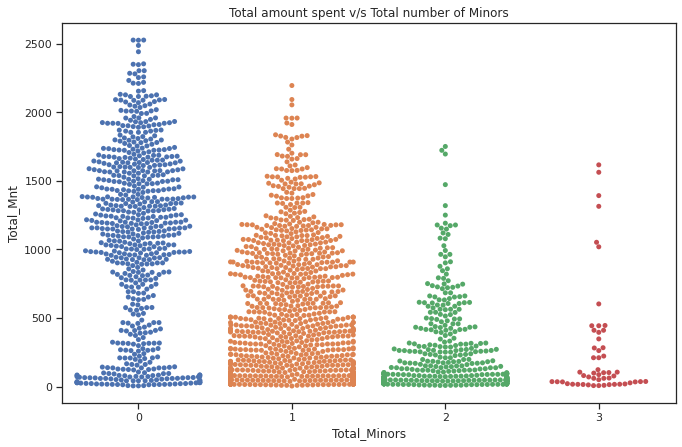

In [86]:
plt.figure(figsize=(11,7))
sns.swarmplot(x='Total_Minors',y='Total_Mnt',data=dataset)
plt.title("Total amount spent v/s Total number of Minors")

From this we can infer that families with more minors tend to spent less than the families with no minors

**5)What level of education do most complainants have?**

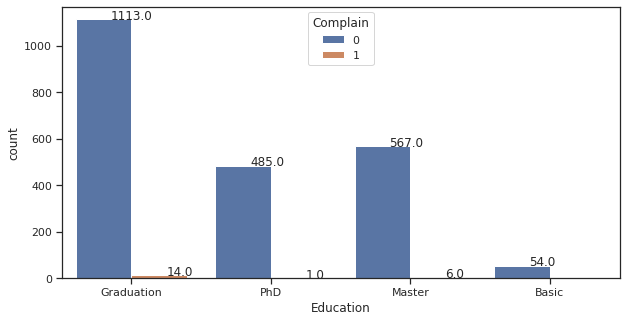

In [87]:
plt.figure(figsize=(10,5))
ec = sns.countplot(x='Education',hue='Complain',data=dataset)
for p in ec.patches: 
    ec.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 
plt.show()

Most of the complaints were made by customer with education of graduation

**6)Top 5 countries of the Market**


In [88]:
country_names=dataset.Country.value_counts().index
country_names

Index(['SP', 'SA', 'CA', 'AUS', 'IND', 'GER', 'US', 'ME'], dtype='object')

In [89]:
country_val=dataset.Country.value_counts().values

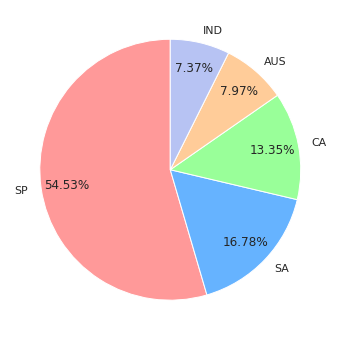

In [90]:
#pie chart top 5 countries that use this market
plt.figure(figsize=(12,6))#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#B7C3F3']
#explsion
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)
plt.pie(country_val[:5],labels=country_names[:5],autopct='%1.2f%%', colors = colors,startangle=90, pctdistance=0.8)
plt.show()

observation: 1) Most of the cutomers are from spain followed by south africa,canada, australia and lastly india.

**7)Countries that have least participation in the market**

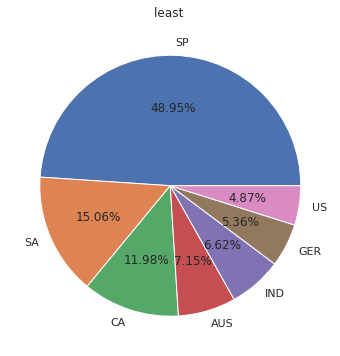

In [91]:
plt.figure(figsize=(12,6))
plt.title('least ')
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#B7C3F3']
plt.pie(country_val[:-1],labels=country_names[:-1],autopct='%1.2f%%')
plt.show()

least country that participates in the market is US and Germany

**8)Which Country has the most acceptance in last campaign?**

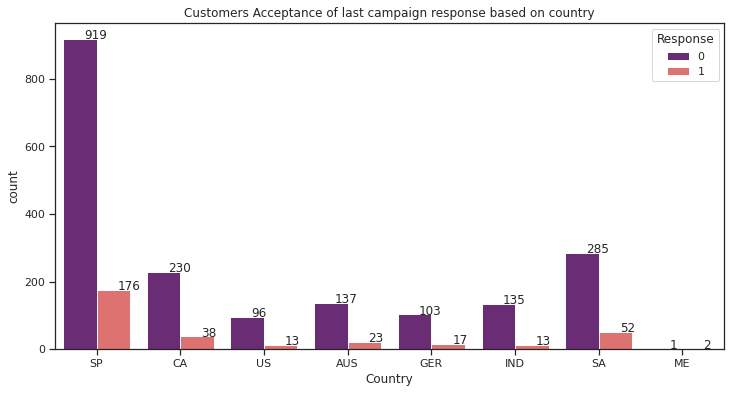

In [92]:
plt.figure(figsize=(12,6))
cs = sns.countplot(x='Country',hue='Response',data=dataset,palette="magma")
plt.title('Customers Acceptance of last campaign response based on country');
for p in cs.patches: 
    cs.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 
plt.show()

**9)What type of purchases are the most successful?**


In [93]:
Purchases = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
Purchases_total = []
for i in range(0,4):
  print("{} = {}".format(Purchases[i],dataset[Purchases[i]].sum(axis=0)))
  Purchases_total.append(dataset[Purchases[i]].sum(axis=0))

NumDealsPurchases = 5208
NumWebPurchases = 9150
NumCatalogPurchases = 5963
NumStorePurchases = 12970


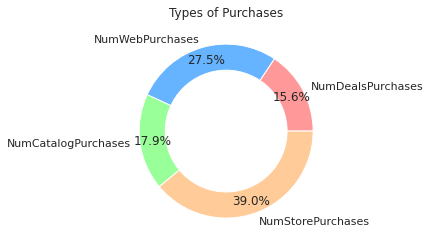

In [94]:
plt.pie(Purchases_total, colors=colors, labels=Purchases,
        autopct='%1.1f%%', pctdistance=0.85)
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Types of Purchases')
  
# Displaying Chart
plt.show()

# Data Models

**1)Will the customer accept our latest campaign? (Random Forest)**


In [119]:
data=pd.read_csv("/content/marketing-data-full_total.csv")

In [120]:
data.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Total_Minors',
       'Total_Mnt', 'Total_Num', 'Total_AcceptedCmp'],
      dtype='object')

In [121]:
data.drop(["Unnamed: 0", "ID"],axis=1,inplace=True)

In [128]:
encoded_df=data
encoded_df=encoded_df.drop(columns=['Dt_Customer','Country'])
encoded_df=pd.get_dummies(encoded_df,prefix=['Education','Marital_Status'])

In [129]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_Birth               2240 non-null   int64  
 1   Income                   2240 non-null   float64
 2   Kidhome                  2240 non-null   int64  
 3   Teenhome                 2240 non-null   int64  
 4   Recency                  2240 non-null   int64  
 5   MntWines                 2240 non-null   int64  
 6   MntFruits                2240 non-null   int64  
 7   MntMeatProducts          2240 non-null   int64  
 8   MntFishProducts          2240 non-null   int64  
 9   MntSweetProducts         2240 non-null   int64  
 10  MntGoldProds             2240 non-null   int64  
 11  NumDealsPurchases        2240 non-null   int64  
 12  NumWebPurchases          2240 non-null   int64  
 13  NumCatalogPurchases      2240 non-null   int64  
 14  NumStorePurchases       

In [130]:
# Split the data into training and test sets
x=encoded_df.iloc[:, encoded_df.columns !='Response']
y=encoded_df.iloc[:,23]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [131]:
y_pred=classifier.predict(x_test)

In [132]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.65


In [133]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.62      0.69       167
           1       0.60      0.91      0.73       284
           2       0.00      0.00      0.00        96
           3       0.00      0.00      0.00        13

    accuracy                           0.65       560
   macro avg       0.35      0.38      0.35       560
weighted avg       0.54      0.65      0.57       560



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [134]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[103,  64,   0,   0],
       [ 25, 259,   0,   0],
       [  1,  95,   0,   0],
       [  2,  11,   0,   0]])

**2)Purchase prediction (Linear Regression)**

In [108]:
data2=pd.read_csv("/content/marketing-data-full_total.csv")

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# isolate X and y variables, and perform train-test split
X = data2[["NumStorePurchases","NumCatalogPurchases","NumWebPurchases","NumDealsPurchases"]]
y = data2['Total_Num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predictions
preds = model.predict(X_test)

# evaluate model using RMSE
print("Mean Value of TotalNum:-",data2["Total_Num"].mean())
print("10% of mean value of TotalNum" ,(data2["Total_Num"].mean())*10/100)
print("Linear regression model RMSE: ", np.sqrt(mean_squared_error(y_test, preds)))

Mean Value of TotalNum:- 20.178571428571427
10% of mean value of TotalNum 2.017857142857143
Linear regression model RMSE:  1.8200365603126172


As the RMSE value is less than 10% mean value of Total_num that means our model is prediction very well.

In [113]:
coeff=pd.DataFrame(model.coef_,X.columns,columns=["Coefficient"])
coeff

,Coefficient
NumStorePurchases,0.768832
NumCatalogPurchases,0.634787
NumWebPurchases,1.170665
NumDealsPurchases,1.416098


In [114]:
df2=pd.DataFrame({"Actual": y_test,"Predicted": preds})
df2

,Actual,Predicted
779,20,22.790866
389,17,18.944405
510,18,15.980767
1553,25,25.253762
1172,30,31.087036
...,...,...
512,36,36.114038
536,29,28.571917
1094,21,23.168041
1999,11,10.819720
